In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
complete_data=pd.merge(study_results,mouse_metadata,how="left")
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
complete_data["Mouse ID"].nunique()

249

In [5]:
#i try to see the number of rows with the all data
complete_data["Mouse ID"].count()

1893

In [6]:
#with this, i eliminate the duplicates rows
review_data3=complete_data.drop_duplicates(keep="first")
review_data3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
#with this, i confirm that i eliminate the duplicates rows
review_data3["Mouse ID"].count()

1892

In [8]:
#with this,i confirm that i didnt eliminate a mice 
review_data3["Mouse ID"].nunique()

249

# SUMMARY STATISTIC


In [9]:
summary=review_data3.groupby("Drug Regimen")
mean_tumor=pd.DataFrame({"Mean Tumor Volume":summary["Tumor Volume (mm3)"].mean()})
mean_tumor

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [10]:
median_tumor=pd.DataFrame({"Median Tumor Volume":summary["Tumor Volume (mm3)"].median()})
median_tumor

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [11]:
variance_tumor=pd.DataFrame({"Tumor Volume Variance":summary["Tumor Volume (mm3)"].var()})
variance_tumor

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.278090
Ramicane,23.486704
Stelasyn,59.450562


In [12]:
std_dev_tumor=pd.DataFrame({"Tumor Volume Std. Dev.":summary["Tumor Volume (mm3)"].std()})
std_dev_tumor

,Tumor Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [13]:
sem_tumor=pd.DataFrame({"Tumor Volume Std. Err.":summary["Tumor Volume (mm3)"].sem()})
sem_tumor

,Tumor Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.514041
Ramicane,0.320955
Stelasyn,0.573111


In [14]:
summary_tumor=pd.merge(mean_tumor,median_tumor,on="Drug Regimen",how="outer")
summary_tumor=pd.merge(summary_tumor,variance_tumor,on="Drug Regimen",how="outer")
summary_tumor=pd.merge(summary_tumor,std_dev_tumor,on="Drug Regimen",how="outer")
summary_tumor=pd.merge(summary_tumor,sem_tumor,on="Drug Regimen",how="outer")
summary_tumor

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
summary_tumor_2=summary.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_tumor_2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# BAR AND PIE CHARTS

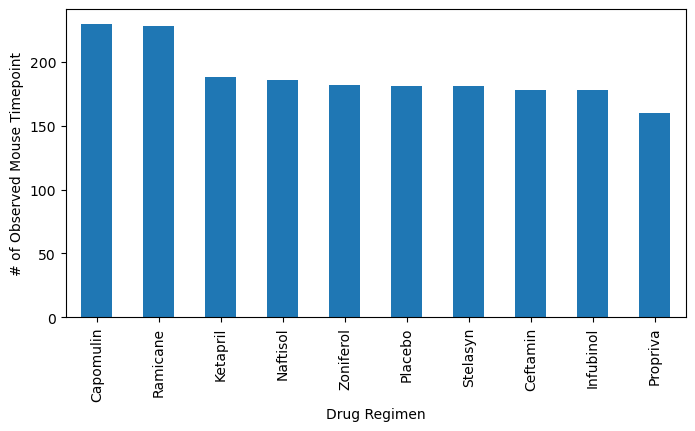

In [16]:
#create the bar chart using pandas
count_mouse=summary["Drug Regimen"].count()
mouse_bar=count_mouse.sort_values(ascending=False)

count_bar=mouse_bar.plot(kind="bar",figsize=(8,4))
count_bar.set_xlabel("Drug Regimen")
count_bar.set_ylabel("# of Observed Mouse Timepoint")

plt.show()


Text(0, 0.5, '# of Observed Mouse Timepoint')

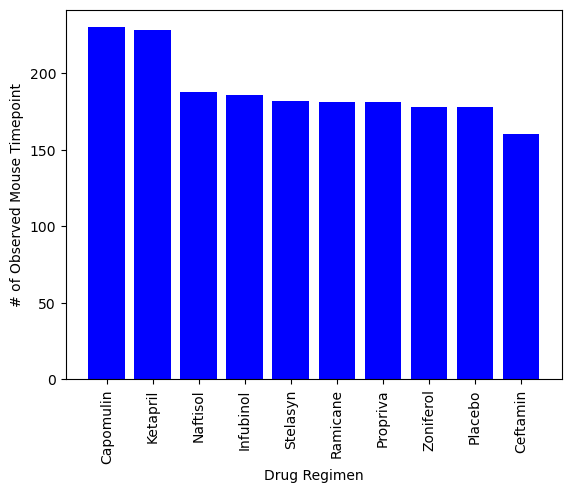

In [17]:

count_mouse=summary["Drug Regimen"].count()
mouse_bar=count_mouse.sort_values(ascending=False)
name=review_data3["Drug Regimen"].unique()
#print(name)

x_label=np.arange(len(name))
#print(x_label)

plt.bar(x_label,mouse_bar,color="b",align="center")

plt.xticks(x_label,name,rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoint")

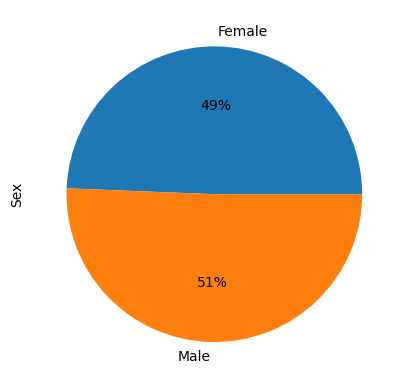

In [18]:
#create the pie chart using pandas
sex_data=review_data3.groupby("Sex")
sex_df=sex_data["Sex"].count()
#sex_df
pie_chart_panda=sex_df.plot(kind="pie",y="Sex",autopct='%1.0f%%')
#plt.axis("equal")
plt.show()

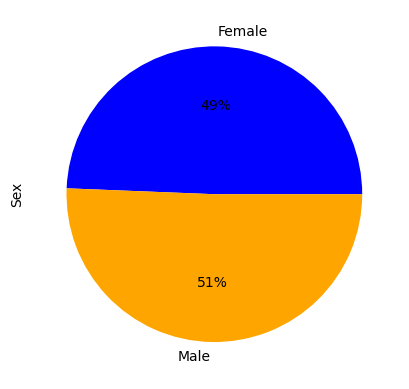

In [19]:
#create the pie chart using Python

plt.pie(sex_df,labels=["Female","Male"],colors=["blue","orange"],shadow=False,startangle=0,autopct='%1.0f%%')
#plt.axis("equal")
plt.ylabel("Sex")
plt.show()

# QUARTILE, OUTLIERS AND BOXPLOTS

In [138]:
#PRIMERO, FILTRAMOS LA DATA PARA LOS CUADRO REGIMENS
# Start by getting the last (greatest) timepoint for each mouse

mouse_res=study_results.groupby("Mouse ID")
mouse_lst=mouse_res["Timepoint"].max()
mouse_lst

#sume_data=review_data3.loc[(review_data3["Drug Regimen"]=="Capomulin")|
 #                            (review_data3["Drug Regimen"]=="Ramicane")|
  #                           (review_data3["Drug Regimen"]=="Infubinol")|
   #                          (review_data3["Drug Regimen"]=="Ceftamin")]


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [139]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_data=pd.merge(mouse_lst,review_data3,on=["Mouse ID", "Timepoint"],how ="left")
new_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [    Tumor Volume (mm3)
31           36.321346]
Ceftamin potential outliers: []


<function matplotlib.pyplot.show(close=None, block=None)>

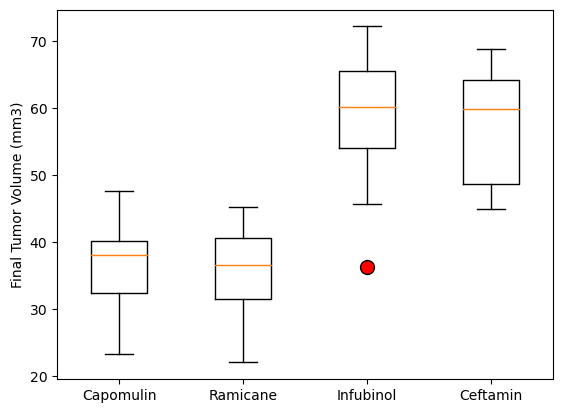

In [198]:

# Put treatments into a list for for loop (and later for plot labels)
treatmets=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data= []

for treats in treatmets:
    data= new_data.loc[new_data["Drug Regimen"]==treats]
    data=data.loc[:,["Tumor Volume (mm3)"]]
    #tumor_volume_data[treats]=data["Tumor Volume (mm3)"].values
    tumor_volume_data.append(data["Tumor Volume (mm3)"].values)
    
    quartiles=data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    #print(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq

    #print(iqr)
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    outliers=[]
    for x in data["Tumor Volume (mm3)"]:
        if (x<lower_bound or x>upper_bound):
            outliers.append(data.loc[data["Tumor Volume (mm3)"]==x,:])
            #outliers["Tumor Volume (mm3)"]=

    print(f"{treats} potential outliers: {outliers}")
      


#capo_data= new_data.loc[new_data["Drug Regimen"]==treatmets[1]]
#tumor_vol_data.append(capo_data["Tumor Volume (mm3)"].values)
#tumor_volume_data

fig1,ax1=plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")

ax1.boxplot(tumor_volume_data,flierprops=dict(markerfacecolor="red",markersize=10))
plt.xticks([1,2,3,4],treatmets)
plt.show


#boxplot=tumor_volume_data.boxplot(column=treatmets)
#plt.show
#print(tumor_vol_data[])



# LINE AND SCATTER PLOTS


Text(0.5, 1.0, 'Capomulin Treatment of mouse l509')

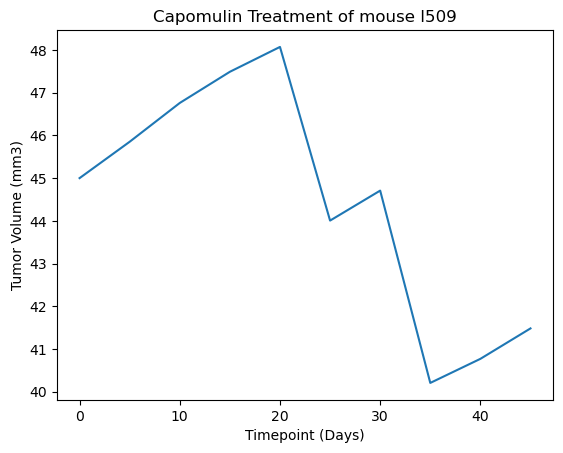

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin Mouse I509
mouse_l509=review_data3.loc[review_data3["Mouse ID"]=="l509"]
mouse_l509=mouse_l509.loc[mouse_l509["Drug Regimen"]=="Capomulin"]
mouse_l509

plt.plot(mouse_l509["Timepoint"],mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")

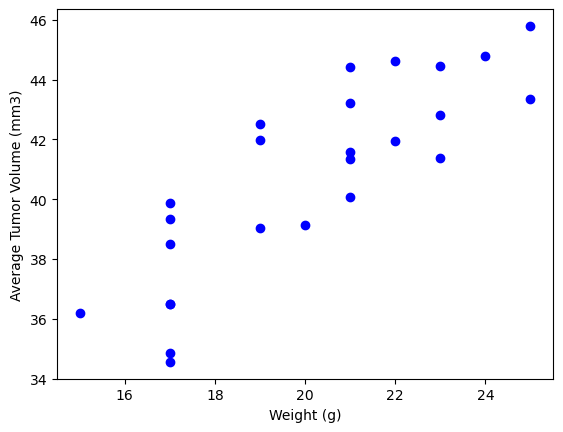

The correlation between mouse weight and the average tumor volume is 0.84


In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot_data=review_data3.loc[review_data3["Drug Regimen"]=="Capomulin"]
scatter_plot_data=scatter_plot_data.groupby("Mouse ID")
weigth=scatter_plot_data["Weight (g)"].mean()
volume_mean=scatter_plot_data["Tumor Volume (mm3)"].mean()

scatter_plot_data

plt.scatter(weigth,volume_mean,marker="o",facecolor="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()




# CORRELATION AND REGRESSION

The correlation between mouse weight and the average tumor volume is 0.84


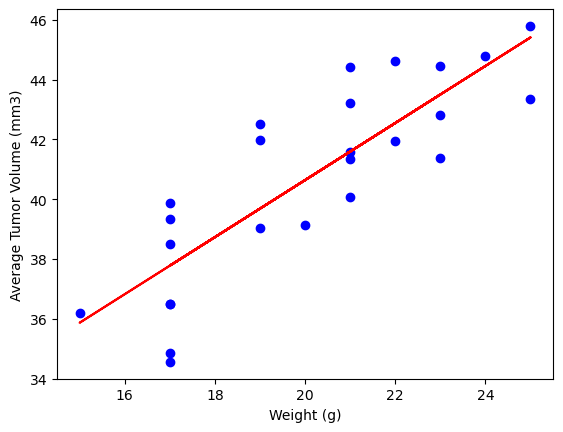

In [110]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weigth,volume_mean)[0],2)}")

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(weigth,volume_mean) 

regress_value=weigth*slope+intercept
line_eq= "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weigth,volume_mean,marker="o",facecolor="blue")
plt.plot(weigth,regress_value,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
